In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
print(np.__version__)
print(pd.__version__)
print(tf.__version__)

1.19.5
1.3.4
2.6.0


In [4]:
X = np.array([
    -7., -4., -1., 2., 5., 8., 11., 14.
])

y = np.array([
    3., 6., 9., 12., 15., 18., 21., 24.
])

print(X, X.shape)
print(y, y.shape)

[-7. -4. -1.  2.  5.  8. 11. 14.] (8,)
[ 3.  6.  9. 12. 15. 18. 21. 24.] (8,)


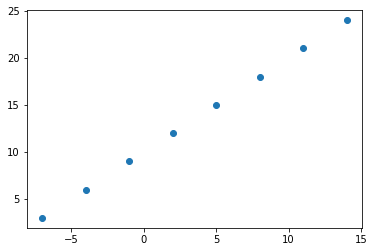

In [5]:
# 산점도! 
plt.scatter(X, y)

In [6]:
# BA : Business Analytics    / 현재 business 상황을 파악하는 수준
# BI : Business Intelligence / 현재 business 상황은 파악이 되었고, 이를 바탕으로 사업을 위해 예측

In [7]:
house_info = tf.constant(["bedroom", "bathrom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathrom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [8]:
house_info.shape

TensorShape([3])

In [9]:
X = tf.constant([
    -7., -4., -1., 2., 5., 8., 11., 14.
])

y = tf.constant([
    3., 6., 9., 12., 15., 18., 21., 24.
])

print(X, X.shape)
print(y, y.shape)

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32) (8,)
tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32) (8,)


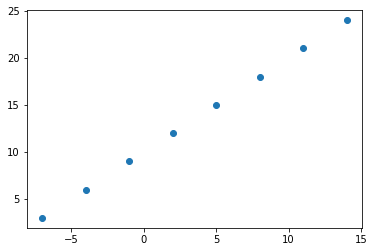

In [10]:
plt.scatter(X, y)

In [11]:
input_shape = X[0].shape

output_shape = y[0].shape

print(X[0], y[0])
print(input_shape, output_shape)

tf.Tensor(-7.0, shape=(), dtype=float32) tf.Tensor(3.0, shape=(), dtype=float32)
() ()


In [12]:
# tensorflow 1.X vs. tensorflow 2.X
# 
# Tensorflow 2.X에서 머신러닝이나 딥러닝을 한다...
# Keras를 사용하게 된다.
# 
# Tensorflow를 가지고 머신러닝이나 딥러닝을 하는 방법
# 1. Sequential (난이도 하)
# 2. Functional (난이도 중)
# 3. Subclass (난이도 상)

In [13]:
# Tensorflow로 머신러닝이나 딥러닝을 한다.
# 1. 데이터 준비
# 2. 모델 생성 (create) : 신경망을 구성하는 레이어 (층)들을 직접 구성 / 전이학습에서 사용할 이전의 모델을 가져온다
# 3. 모델을 컴파일 (compile) : 모델 성능(performance)을 어떻게 측정 (loss/metrics)할지 그리고 학습을 어떻게 개선할지 (optimizer)
# 4. 모델을 학습시킨다 (fit) : 모델이 데이터있는 패턴을 찾을 수 있도록 합니다.

In [14]:
# batch size : 데이터셋이 존재할 경우, 1번에 다 학습시키면, 메모리 부족현상 발생할 수도 있고, 효율성이 부족하다
#               전체 데이터에서 학습할 때마다 얼만큼 가져올 것인지 ex) 데이터가 100개 batch size 10으로 / 10번 쪼개서 학습
# epoch : 데이터셋이 있을 때, 이 데이터셋을 몇 번 학습시킬 것인지 지정 / 똑같은 문제집을 몇 번 볼거냐...
# 1epoch에서 10번으로 나누어서 학습을 한다.


In [15]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 234ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 1000us/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 1000us/step - loss: 10.9748 - mae: 10.9748


In [16]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# 우리가 지금 모델을 만든 이유! ===> 예측 (predict) 을 하고 싶다!
model.predict(
    [17.]
)

array([[12.716021]], dtype=float32)

In [18]:
# 모델을 개선하기 위해...
# 1. 데이터를 많이 준비 (더 많은 것으로 학습을 한다)
# 2. 모델 생성시 레이어를 더 추가하거나, 각 레이어에 포함되는 뉴런을 추가, 활성화 함수를 변경
# 3. 모델 컴파일시 optimization 함수를 변경하거나 learning rate를 수정
# 4. 모델 학습시 epoch를 늘려준다 (더 오래 학습한다)

In [19]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 133ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 1000us/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s

In [20]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
model.predict(
    [17.0]
)

array([[30.158512]], dtype=float32)

In [22]:
# MLOps, AIOps, DataOps
# 모델을 생성 -> 이 모델을 평가 -> 모델을 개선해서 다시 생성 -> 이 모델을 평가 -> 모델을 개선해서 다시 생성 -> 이 모델을 평가 -> ....

In [23]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [24]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [25]:
# y = X + 10
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [26]:
# 데이터들을 나누기
# Traning set : 이 데이터로 모델은 학습을 한다. 전체 데이터셋에서 70 ~ 80%
# Validation set (optional) : 학습을 할 때 잘하고 있는지 확인하는 데이터 / 수능 모의고사
# Test set : 학습한 모델을 test하기 위한 데이터, validation set이 없다하면 20 ~ 30% / 수능

In [27]:
len(X)

50

In [28]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

In [29]:
# 시각화, 시각화, 시각화!

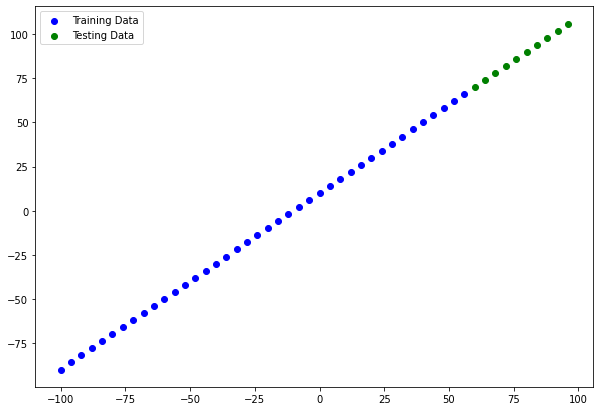

In [30]:
plt.figure(figsize = (10, 7))

plt.scatter(X_train, y_train, c = "b", label = "Training Data")
plt.scatter(X_test, y_test, c = "g", label = "Testing Data")

plt.legend()

In [31]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

# model.fit(X, y, epochs = 100)

In [32]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [33]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])# 이 부분 추가
])

model.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Total params: 모델에 존재하는 파라미터의 총갯수
# Trainable params: 학습을 하면서 모델이 최신화하는 파라미터의 갯수
# Non-trainable params: Trainable param의 반대 개념

In [36]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)# 출력은 안함

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [38]:
!pip install keras-utils

You should consider upgrading via the 'd:\git\study\tensorflow_nlp\tensorflow_nlp\scripts\python.exe -m pip install --upgrade pip' command.


In [39]:
from tensorflow.keras.utils import plot_model

In [41]:
!pip install graphviz

You should consider upgrading via the 'd:\git\study\tensorflow_nlp\tensorflow_nlp\scripts\python.exe -m pip install --upgrade pip' command.


In [42]:
!pip install pydot

You should consider upgrading via the 'd:\git\study\tensorflow_nlp\tensorflow_nlp\scripts\python.exe -m pip install --upgrade pip' command.


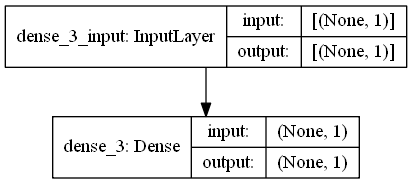

In [43]:
plot_model(model, show_shapes = True)